In [1]:
import mapsims
import numpy as np
import healpy as hp
import pysm3.units as u
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

# Access CMB realizations

Check the documentation of the [`201911_lensed_cmb`](https://github.com/simonsobs/map_based_simulations/tree/master/201911_lensed_cmb) release.

This release contains 100 lensed CMB maps with no primordial tensor modes.

In [2]:
channel = mapsims.parse_channels("ST0_UHF1")[0]

# Load maps from a map based release at NERSC

In [3]:
folder = "/project/projectdirs/sobs/v4_sims/mbs/201911_lensed_cmb"

In [4]:
!ls $folder/512

cmb


In [5]:
filename_template = "{nside}/{content}/{num:04d}/simonsobs_{content}_uKCMB_{telescope}{band}_nside{nside}_{num:04d}.fits"

In [6]:
filenames = [Path(folder) / filename_template.format(nside=512, content="cmb", num=num, 
                        telescope=channel.telescope.lower(), band=channel.band) for num in range(10)]

In [7]:
maps = [hp.ma(hp.read_map(filename, (0,1,2))) for filename in filenames]

/global/common/software/sobs/mbs/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


# Apply a scanning strategy cut

The `mapsims.SONoiseSimulator` class, which is used to simulate noise, can also automatically download hitmaps that were simulated by TOAST in time domain.

In [8]:
noise = mapsims.SONoiseSimulator(nside=512)

In [9]:
hitmaps, ave_nhits = noise.get_hitmaps(tube=channel.tube)

/global/common/software/sobs/mbs/lib/python3.7/site-packages/mapsims/utils.py:71: UserWarning: Access data from /global/cfs/cdirs/sobs/www/so_mapsims_data/v0.2/healpix/ST0_UHF1_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz
  warnings.warn(f"Access data from {full_path}")
/global/common/software/sobs/mbs/lib/python3.7/site-packages/mapsims/utils.py:71: UserWarning: Access data from /global/cfs/cdirs/sobs/www/so_mapsims_data/v0.2/healpix/ST0_UHF2_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz
  warnings.warn(f"Access data from {full_path}")


For this simulation set the hitmaps are the same for both channels but in principle they might be different.

In [10]:
for each in maps:
    each[:, hitmaps[0] == 0] = hp.UNSEEN

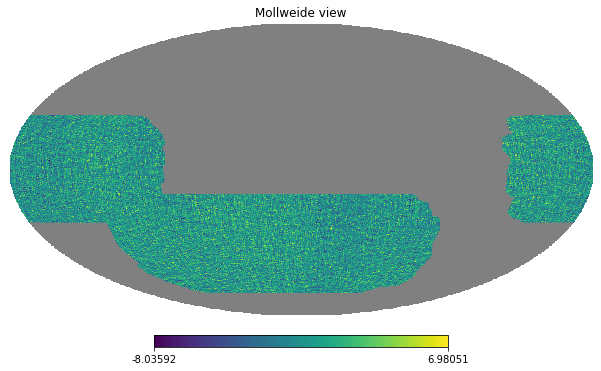

In [11]:
hp.mollview(maps[0][1])

In [12]:
# using iter=0 to speed it up, for production runs set use_pixel_weights=True
cls = [hp.anafast(each, lmax=512, iter=0) for each in maps]

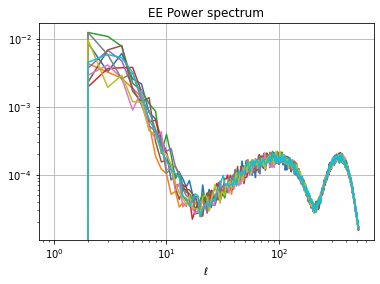

In [13]:
plt.figure()
plt.title("EE Power spectrum")
for cl in cls:
    plt.loglog(cl[1])
plt.grid()
plt.xlabel("$\ell$");

# Add foregrounds

We can load concurrently some maps from the foregrounds release and co-add them,
we can get the paths from the previous notebook.

In [14]:
folder = "/project/projectdirs/sobs/v4_sims/mbs/201906_highres_foregrounds_extragalactic_tophat"

In [15]:
filename_template = "{nside}/{content}/{num:04d}/simonsobs_{content}_uKCMB_{telescope}{band}_nside{nside}_{num:04d}.fits"

In [16]:
filename = Path(folder) / filename_template.format(nside=512, content="dust", num=0, 
                                                   telescope=channel.telescope.lower(), band=channel.band)

In [17]:
dust = hp.read_map(filename, (0,1,2))

/global/common/software/sobs/mbs/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


Need to be careful with this operation, we do not want to override UNSEEN pixels,
here it works because we are using `hp.ma` masked array which handles that automatically.

In [18]:
for each in maps:
    each += dust

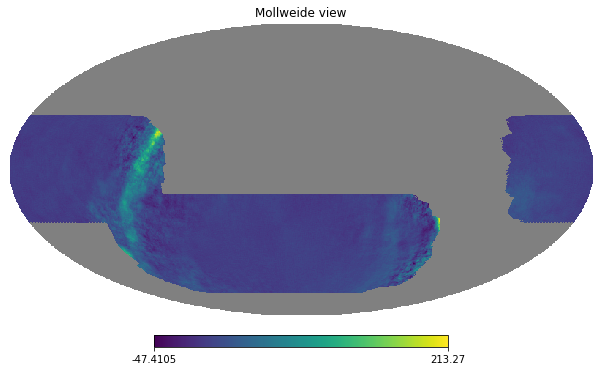

In [19]:
hp.mollview(maps[0][1])